# Drawing with fourier series

This notebook describes the process into coding a fourier series drawing with epicycles. 

### First Aproach


Let's start defining a signal that we know the result of the fourier series to compare the result. I'm gonig to use a square wave signal because the coeficients of the fourier series are given by the next equiation.

$$
\sum_{n=0}^{\infty} \frac{A * sin((2n + 1)*\theta )}{(2n + 1)*\pi }
$$

I define the signal by hand and also import the libraries that I'll be using in the wholle code.

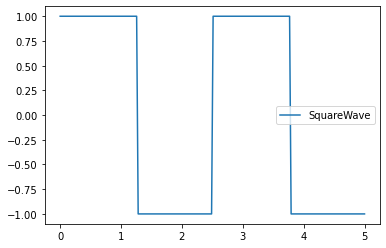

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0,5,200)
y = np.ones(len(t))



for i in range(len(t)):
	if (i % 100) > 50:
		y[i] = -1
        
plt.plot(t,y, label='SquareWave')
plt.legend()

The idea of the Fourier Series is that any periodical signal can be reconstruced by sumation of sinusoidal function with the right amplitud and phase. For this particular case, the series is the sumation of sines defined above. In theory at infinity the infinite sum and the original signal are the same, but we can't go up to infinity with a computer. However, we can see that when we increse the n values, the result gets closer and closer to the original. Add reference to the spikes in the discontinuity.

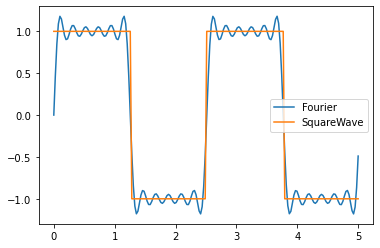

In [2]:
iteration_sum = 6
series = 0

for n in range(iteration_sum):
    series += 4*(np.sin( (2*n+1)* 2.5*t))/( (2*n+1) * np.pi)
    
plt.plot(t, series, label='Fourier')
plt.plot(t,y, label='SquareWave')
plt.legend()

The aplha value is the period of the original series but to match the amplitude I have to multiply the series by four and I don't know why. But the concept it's clear and can be visualize incermenting the iterarion_sum value.


### Discrete Fourier Transform (DFT)

The equation of the representation of the square wave derives from the formal definition of the fourier series. The general definition is in the continious domain, so we define the (DFT) in the discrete domain as follow:

$$
X[k] = \sum_{n=0}^{N-1} x[n] * e^{-ink\frac{2\pi }{N}}
$$

Where $X[k]$ are the coeficients. $x[n]$ is the signal. $N$ is the lenght of the signal. And $k$ is an integet that defines the order of the coeficients.

The coeficients are the ones that contarin the amplitude and phase information. With this coeficients we define the sumation:

$$
f(t) = \left \| C_0 \right \| + \left \| C_1 \right \| *e^{1it + arg(c_1)} + \left \| C_k \right \| *e^{kit + arg(c_k)}
$$

We can think that each sum represent one circlue with a frecuency of ratation given by the integer, and a certain amplitude and fase. This is the principle which we are going to use to draw figures. Python handles correctly the operations with complex number if there are correctly define.

In [3]:
def dft(x,y,n_sumations):
    i = 1j
    N = len(y)

    complex_signal = x + y*i 
    
    coeff = np.zeros(n_sumations, dtype=complex)

    for k in range(n_sumations):
        for n in range(N - 1):
            coeff[k] += (complex_signal[n]) * (np.exp(-i*n*k*2*np.pi/N))

    return coeff
    

I asign to the x and y values of the signal the variable $x_n$ as a complex number. Then use the Eulers verision of the DFT to obtain the coefficients, and then I crete a dictionary to store the amplitude with the absolute values of this complex number and phase with the function angle of numpy. The next step is code the fourier series with this coeficients.The signal is always periodic, so we define t between 0 and $2\pi$.


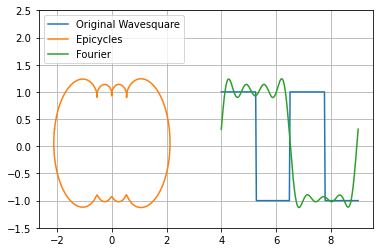

In [4]:
def sum_fourier(coeff, num_coeff, N, rotate=0):
    t = np.linspace(0,2*np.pi,1000)
    
    if len(coeff) != num_coeff:
        coeff = coeff[0:num_coeff]
    series = 0 + 0j
    
    for k in range(num_coeff):
        series += (coeff[k]) * (np.exp(k*t*1j + rotate))
        
    return series / N

n = 8
N = len(y)

#Explicar que los ceros es porque lo estamos haciendo en una dimensión
zeros = np.zeros(len(y))
coeff = dft(y[0:int((len(y)/2))], zeros[0:int((len(y)/2))],n)

time_square = np.linspace(0,5,1000)
period = 2.5/2
fourier_square = sum_fourier(coeff, n,N/2)

plt.plot(t + 4,y, label='Original Wavesquare')
plt.plot(fourier_square.imag*2, fourier_square.real*2, label='Epicycles')
plt.plot(time_square + 4, fourier_square.real*2, label='Fourier')
plt.legend(loc='upper left')
plt.ylim(-1.5,2.5)
plt.grid()

We obtain the correct result, but I have to adjust the amplitud of the signal. In this case what I want is the signal of the square wave which isY, so I create a zeros for the imaginary part of the dft. The image of the form of the cycles was rotate wrongly so I exchange the imaginary and real components to shift it correctly.

## Visualizing the epysicles

Now insted of visualize only the final form of the epicycles I want to be abel to see all of them. One think that I want to take care is the order of this epicycles. For the propieties of the sum, anycombination of the factors will lead to the same result, so for a more pleaseant visualization, I can sort the amplitude of each epycicle and then graph them in that order.

In [5]:
def get_amp(coeff):
    amp = abs(coeff)
    amp_list = []
    amp_index_list = []
    for index, amp_val in enumerate(amp):
        amp_dicc[amp[index]] = index
           
    return amp_dicc, amp

def position_index(a):
    return sorted(range(len(a)), key=lambda k: a[k], reverse=True)

In [6]:
def circles(coeff, N, frames = 0):
    epycicles = []
    amp = abs(coeff)
    index = sorted(range(len(amp)), key=lambda k: amp[k], reverse=True)
    amp = sorted(amp, reverse=True)
    t = np.linspace(0,2*np.pi,1000)
    radio = 0 + 0j
    radio_list = [radio]
    
    for i in range(len(coeff)):
        k = index[i]
        phase = np.angle(coeff[k])
        circle = amp[i] * np.exp(k* (t + phase)*1j) + radio
        radio = circle[frames]
        
        epycicles.append(circle/N)
        radio_list.append(radio/N)
        
    return epycicles, radio_list

In [7]:
coeff_2 = fft(y)
coeff_2 = coeff_2[0:20]

amp = abs(coeff_2)
index = sorted(range(len(amp)), key=lambda k: amp[k], reverse=True)
amp = sorted(amp, reverse=True)


NameError: name 'fft' is not defined

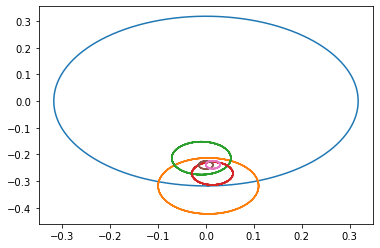

In [8]:
from scipy.fft import fft

coeff_2 = fft(y)
coeff_2 = coeff_2

arr , radio = circles(coeff, len(y))


for i in range(7):
    plt.plot(arr[i].real, arr[i].imag)

Now I have a list with all the epicycles express as multiple complex numbers. Lets take a look about how a few of this cyrcles move in time.

In [ ]:
import matplotlib.animation as anim

arr , radio = circles(coeff_2, len(y))

fig, ax = plt.subplots()

line, = ax.plot(arr[0].real, arr[0].imag)
line1, = ax.plot(arr[1].real, arr[1].imag)
line2, = ax.plot(arr[2].real, arr[2].imag)
line3, = ax.plot(arr[3].real, arr[3].imag)
line4, = ax.plot(arr[4].real, arr[4].imag)
line5, = ax.plot(arr[5].real, arr[5].imag)



def animation(i):
    new_cyrcle , new_radius = circles(coeff, 200, frames=i)
    
    line.set_xdata(new_cyrcle[0].real)
    line.set_ydata(new_cyrcle[0].imag)
    
    line1.set_xdata(new_cyrcle[1].real)
    line1.set_ydata(new_cyrcle[1].imag)
    
    line2.set_xdata(new_cyrcle[2].real)
    line2.set_ydata(new_cyrcle[2].imag)

    line3.set_xdata(new_cyrcle[3].real)
    line3.set_ydata(new_cyrcle[3].imag)
    
    line4.set_xdata(new_cyrcle[4].real)
    line4.set_ydata(new_cyrcle[4].imag)
    
    line5.set_xdata(new_cyrcle[5].real)
    line5.set_ydata(new_cyrcle[5].imag)
    
    return line,

ani = anim.FuncAnimation(fig, animation, interval = 20, frames=500)

Every animation has to be converted to html video if you want to run it in notebooks and it might take a few seconds. In this notebook there are many animation so I comment all of them to quickly run all the notebook and only watch the animation you want to see.

In [ ]:
from IPython.display import HTML
#HTML(ani.to_html5_video())

For this animation the motion of the cycles seems right, but I', going to improve the animation to make the graph more understandable. (With num equals 7 we have a nice looking animation)

In [ ]:
import matplotlib.animation as anim

coeff = fft(y)[0:100]
coeff_utiles = np.zeros(0,dtype=complex)


for i in range(len(coeff)):
    if abs(coeff[i]) > 4:
        coeff_utiles = np.append(coeff_utiles,coeff[i])
        
arr , radio = circles(coeff_utiles, len(y))

fig, ax = plt.subplots()

epicycles_list = []
line_list = []
ax.set_xlim(-1.5, 4)
ax.set_ylim(-1,1)

num = 8
radio = radio[0:num + 1]

for i in range(num):
    epicycles, = ax.plot(arr[i].real, arr[i].imag,color='r')
    epicycles_list.append(epicycles)
    
    line, = ax.plot([radio[i].real, radio[i+1].real], [radio[i].imag, radio[i+1].imag], color='b')
    line_list.append(line)
amp_square = [radio[-1].imag]
dt = 2*np.pi/num
trace_time = np.linspace(1,4,700)
trace, = ax.plot(radio[-1].real + 0.1, radio[-1].imag)

#Notebook doesn't care about scoping, if using in other IDE, use global or the fargs argument in FuncAnimation
def animation(i):
    new_cyrcle , new_radius = circles(coeff, 200, frames=i)
    new_radius = new_radius[0: num +1]
    
    for j in range(num):
        epicycles_list[j].set_xdata(new_cyrcle[j].real)
        epicycles_list[j].set_ydata(new_cyrcle[j].imag)
        
        line_list[j].set_xdata([new_radius[j].real, new_radius[j+1].real])
        line_list[j].set_ydata([new_radius[j].imag, new_radius[j+1].imag])
        
    amp_square.append(new_radius[-1].imag)

    trace.set_xdata(trace_time[0:i])
    trace.set_ydata(amp_square[0:i])
    
    return line_list, epicycles_list, trace,

ani3 = anim.FuncAnimation(fig, animation, interval = 40, frames = 700)

In [ ]:
HTML(ani3.to_html5_video())

Con esa configuracion va pero si agrando el num de iter se rompe todo. Cosas que joden es que el K en la animacion hace que el circulo se vea mas grande y hay que filtrar que valores de K usar para que termine bien.

In [ ]:
fig, ax = plt.subplots()

arr , radio = circles(coeff, 200)

cyrcle_list = []
point_list = []
line_list = []
ax.set_ylim(-0.5,0.5)
ax.set_xlim(-0.5,0.5)

num_coef = 15

for i in range(num_coef):
    cyrcle, = ax.plot(arr[i].real, arr[i].imag,color = 'g')
    cyrcle_list.append(cyrcle)
    point, = ax.plot(radio[i].real, radio[i].imag, 'o')
    point_list.append(point)
    line, = ax.plot([radio[i].real, radio[i+1].real], [radio[i].imag, radio[i+1].imag], color='b')
    line_list.append(line)

def animation(i):
    global cyrcle_list
    global line_list
    global point_list
    
    for j in range(num_coef):
        new_cyrcle , new_radio = circles(coeff, 10, frames=t)
            
        cyrcle_list[j].set_xdata(new_cyrcle[j].real)
        cyrcle_list[j].set_ydata(new_cyrcle[j].real)
        print(len(point_list))

        point_list[j].set_xdata[new_radio[j].real]
        point_list[j].set_ydata[new_radio[j].imag]
        
        line_list[j].set_xdata[[new_radio[j].real, new_radio[j+1].real]]
        line_list[j].set_ydata[[new_radio[j].imag, new_radio[j+1].imag]]
        
    return cyrcle_list[0]
    
ani2 = anim.FuncAnimation(fig, animation, interval = 20, frames=500)

### Get the coefficients from scipy.fft

The module fft from scipy provides his own fft that return to us all the coefficiets with k from 0 to n-1. We can look how with this module the whole process gets so much easier.

In [1]:
from scipy.fft import fft
from scipy.fft import fft2
from scipy.fft import ifft

In [10]:
(1 + 5*1j) * (3 + 5*1j)

(-22+20j)

In [2]:
def sum_fourier_2(coeff,N):
    
    time_fourier = np.linspace(0,2*np.pi,1000)
    fourier_series = np.zeros(len(time_fourier), dtype=complex)
    amp = abs(coeff)
    phase = np.angle(coeff)
    
    for t in range(len(time_fourier)):
        for k in range(len(amp)):
            fourier_series[t] += amp[k] * (np.cos(k *time_fourier[t] + phase[k]) + 1j*np.sin(k *time_fourier[t] + phase[k]))

    fourier_series /= N
    
    return fourier_series

### Drawing more advance pattern

To draw a more complex figure, we need to feed the dft a sequence of points in order. I found this drawing of pi on internet.

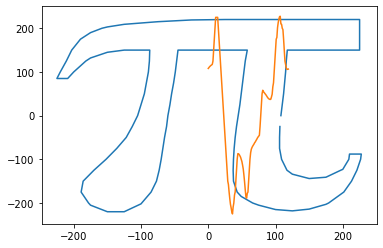

In [5]:
data_pi = np.genfromtxt('pi.csv',delimiter=',')

x_pi = data_pi[:,0]
y_pi = data_pi[:,1]

plt.plot(x_pi,y_pi)
plt.plot(x_pi)

In [6]:
imag = x_pi + 1j * y_pi

coeff = fft(imag)

arr , radio = circles(coeff, len(y))

fig, ax = plt.subplots()

epicycles_list = []
line_list = []

num = 7
radio = radio[0:num + 1]

for i in range(num):
    epicycles, = ax.plot(arr[i].real, arr[i].imag,color='r')
    epicycles_list.append(epicycles)
    
    line, = ax.plot([radio[i].real, radio[i+1].real], [radio[i].imag, radio[i+1].imag], color='b')
    line_list.append(line)
amp_square = [radio[-1].imag]
dt = 2*np.pi/num
trace_time = np.linspace(1,4,700)
trace, = ax.plot(radio[-1].real + 0.1, radio[-1].imag)

#Notebook doesn't care about scoping, if using in other IDE, use global or the fargs argument in FuncAnimation
def animation(i):
    new_cyrcle , new_radius = circles(coeff, 200, frames=i)
    new_radius = new_radius[0: num +1]
    
    for j in range(num):
        epicycles_list[j].set_xdata(new_cyrcle[j].real)
        epicycles_list[j].set_ydata(new_cyrcle[j].imag)
        
        line_list[j].set_xdata([new_radius[j].real, new_radius[j+1].real])
        line_list[j].set_ydata([new_radius[j].imag, new_radius[j+1].imag])
        
    amp_square.append(new_radius[-1].imag)

    trace.set_xdata(trace_time[0: i])
    trace.set_ydata(amp_square[0:i])
    
    return line_list, epicycles_list, trace,

ani4 = anim.FuncAnimation(fig, animation, interval = 40, frames = 700)

NameError: name 'circles' is not defined

In [ ]:
#HTML(ani4.to_html5_video())

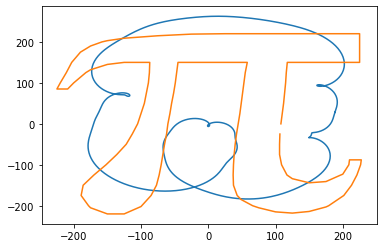

In [33]:
values_complex = x_pi + y_pi*1j


coeff_pi = fft(values_complex)
serie_pi = sum_fourier_2(coeff_pi[0:25], len(x_pi))

plt.plot(serie_pi.real, serie_pi.imag)
plt.plot(values_complex.real, values_complex.imag)

In [30]:
y_pi

array([   0. ,   25. ,   50. ,   75. ,  100. ,  125. ,  150. ,  150. ,
        150. ,  150. ,  150. ,  150. ,  175. ,  200. ,  220. ,  220. ,
        220. ,  220. ,  220. ,  220. ,  220. ,  220. ,  220. ,  219.5,
        219. ,  217. ,  215. ,  212. ,  209. ,  203. ,  200. ,  190. ,
        175. ,  150. ,  125. ,  100. ,   85. ,   85. ,  100. ,  125. ,
        132. ,  145. ,  150. ,  150. ,  150. ,  125. ,  100. ,   75. ,
         50. ,   25. ,    0. ,  -25. ,  -50. ,  -75. , -100. , -125. ,
       -150. , -175. , -200. , -205. , -220. , -220. , -202. , -175. ,
       -150. , -125. , -100. ,  -75. ,  -50. ,  -25. ,    0. ,   25. ,
         50. ,   75. ,  100. ,  125. ,  150. ,  150. ,  150. ,  150. ,
        150. ,  150. ,  125. ,  100. ,   75. ,   50. ,   25. ,    0. ,
        -25. ,  -50. ,  -75. , -100. , -125. , -150. , -175. , -185. ,
       -200. , -205. , -215. , -218. , -214. , -203. , -200. , -175. ,
       -150. , -125. , -100. ,  -88. ,  -88. , -100. , -123. , -125. ,
      

In [7]:
i = 1j
t = np.linspace(0,2*np.pi,1000)
circle0 = (3 + 3j) * np.exp(1*t*i)
circle1 = (7 + 5j) * np.exp(2*t*i)
circle2 = (5 + 9j) * np.exp(3*t*i)
circle4 = (2 + 4j) * np.exp(0*t*i)


def suma_con_complejos(coeff, num_coeff):
    t = np.linspace(0,1,1000)
    coeff_use = coeff[0:num_coeff]
    series = 0 + 0j
    
    for k in range(num_coeff):
        series += (coeff_use[k]) * (np.exp(2*np.pi*k*t*1j))
        
    return series

def suma_con_complejos_2(coeff, num_coeff, normalize):
    time = np.linspace(0,2*np.pi,1000)
    coeff_use = coeff[0:num_coeff]
    series = 0 + 0j
    
    trazo = np.zeros(len(time), dtype=complex)
    for t in range(len(time)):
        for k in range(num_coeff):
            series += (coeff_use[k]) * (np.exp(2*np.pi*k*time[t]*1j))/normalize
        trazo[t] = series
        
    return trazo

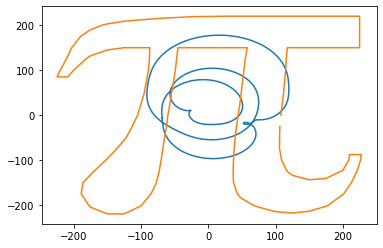

In [10]:
values_complex_final = x_pi + y_pi*1j

coeff_final = fft(x_pi)
coeff_3 = fft(y_pi)


res = 15
serie_rta = suma_con_complejos(coeff_final, res)* 2 /len(x_pi)
serie_2 = suma_con_complejos(coeff_3, res) * 2 / len(x_pi)

serie_real = suma_con_complejos(ifft(values_complex_final), res)

#plt.plot(serie_rta.real, serie_2.real)
plt.plot(serie_real.real, serie_real.imag)

plt.plot(x_pi,y_pi)

In [100]:
serie_real

array([-1.16252686e-15-1.80164525e-16j, -1.18705661e-15-2.60883045e-16j,
       -1.20519493e-15-3.43998755e-16j, -1.21674339e-15-4.28983413e-16j,
       -1.22154814e-15-5.15293029e-16j, -1.21950112e-15-6.02371661e-16j,
       -1.21054096e-15-6.89655316e-16j, -1.19465354e-15-7.76575901e-16j,
       -1.17187217e-15-8.62565215e-16j, -1.14227754e-15-9.47058948e-16j,
       -1.10599720e-15-1.02950065e-15j, -1.06320480e-15-1.10934567e-15j,
       -1.01411899e-15-1.18606497e-15j, -9.59001921e-16-1.25914889e-15j,
       -8.98157542e-16-1.32811072e-15j, -8.31929531e-16-1.39249018e-15j,
       -7.60698961e-16-1.45185664e-15j, -6.84881697e-16-1.50581219e-15j,
       -6.04925552e-16-1.55399445e-15j, -5.21307203e-16-1.59607913e-15j,
       -4.34528910e-16-1.63178234e-15j, -3.45115051e-16-1.66086261e-15j,
       -2.53608494e-16-1.68312260e-15j, -1.60566847e-16-1.69841048e-15j,
       -6.65585978e-17-1.70662104e-15j,  2.78408267e-17-1.70769644e-15j,
        1.22053041e-16-1.70162662e-15j,  2.15500710

In [36]:
serie_2[0:7]

array([10.63636   -253.30623396j, 13.61909768-254.05398261j,
       16.62176117-254.74598076j, 19.64278484-255.38163524j,
       22.6805847 -255.96040645j, 25.73356033-256.48180892j,
       28.8000969 -256.94541185j])

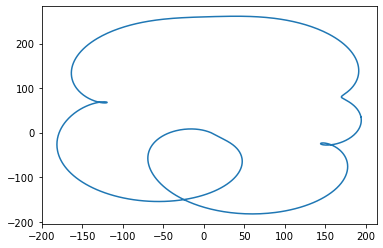

In [18]:
values_complex_final = x_pi + y_pi*1j

#Con esto podemos compara que lo que nos da mi dft y la fft de scipy es lo mismo

coeff_final_2 = dft(x_pi,y_pi, 50)
coeff_final = fft(values_complex_final)



res = 10
serie_rta = suma_con_complejos(coeff_final, res) /len(x_pi)


plt.plot(serie_rta.real, serie_rta.imag)


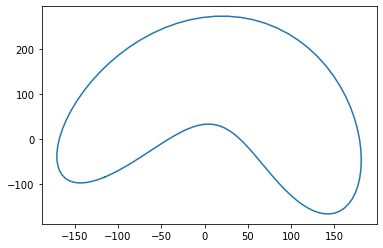

In [119]:
#Checkeando con el video de matologer
t = np.linspace(0,2*np.pi,100)

serie = 10.72 + 16.52j + (-12.64 + 20.9j)*np.exp(1*1j*t) + (-135.66 - 45.57j) *np.exp(-1*1j*t) + (-44.85 - 23.71j) * np.exp(2*1j*t) + (66.75 -53.07j) * np.exp(-2*1j*t)



plt.plot(serie.real, serie.imag)

In [127]:
values_complex_final = x_pi + y_pi*1j

rta = fft(values_complex_final)/len(x_pi)


def dft(x,y,n_sumations):
    i = 1j
    N = len(y)

    complex_signal = x + y*i 
    
    coeff = np.zeros(n_sumations, dtype=complex)

    for k in range(n_sumations):
        for n in range(N - 1):
            coeff[k] += (complex_signal[n]) * (np.exp(-i*n*k*2*np.pi/N))

    return coeff / len(x)

rta_calc = dft(x_pi, y_pi, 15)

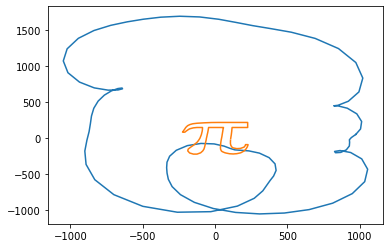

In [135]:
for k in range(15):
    serie += rta_calc[k] * np.exp(k*1j*t)
    
plt.plot(serie.real, serie.imag)
plt.plot(values_complex_final.real, values_complex_final.imag)